# The purpose of this script is to compare average modeled surface temperature with 10m ice core temperatures. We will test this in bias corrected radiation forcing and without bias corrected radiation forcing. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import geopandas as gpd

from datetime import datetime
from Load_and_Process_Datasets import *
from scipy import stats
from palettable.colorbrewer.diverging import *
from palettable.colorbrewer.sequential import *


## Define variables

In [3]:
ice_core_path = "/pl/active/nasa_smb/Data/Ts_Obs_MvdB.txt"
bc_model_path = "/projects/erke2265/1D_Snowpack/Simulations/ice_core/ice_core_"
nbc_model_path = "/projects/erke2265/1D_Snowpack/Simulations/ice_core/ice_core_"

## Get ice core data

In [4]:
ice_core = np.loadtxt(ice_core_path)
ic_lat = ice_core[:,0]
ic_lon = ice_core[:,1]
ic_temp = ice_core[:,3]

## Get bias corrected model data

In [5]:
bc_model_avg_ts = np.zeros(len(ic_lat))
for j in range(0, len(ic_lat)):
    ind_bc_model_path = bc_model_path + str(j+1) + "_bias_corrected_radiation/output/LAT" + str(ic_lat[j]) + "LON" + str(ic_lon[j]) + ".smet"
    if os.path.isfile(ind_bc_model_path):
        bc_model_ts = snwpck_1D.get_smet_timeseries(ind_bc_model_path, "TSS_mod")
        bc_model_avg_ts[j] = float(bc_model_ts.mean())
        print(str(j) + ": SUCCESS")
    else:
        bc_model_avg_ts[j] = np.nan
        print(str(j) + ": FAIL")

0: SUCCESS
1: SUCCESS
2: SUCCESS
3: SUCCESS
4: SUCCESS
5: SUCCESS
6: SUCCESS
7: SUCCESS
8: SUCCESS
9: SUCCESS
10: SUCCESS
11: SUCCESS
12: SUCCESS
13: SUCCESS
14: SUCCESS
15: SUCCESS
16: SUCCESS
17: SUCCESS
18: SUCCESS
19: SUCCESS
20: SUCCESS
21: SUCCESS
22: SUCCESS
23: SUCCESS
24: SUCCESS
25: SUCCESS
26: SUCCESS
27: SUCCESS
28: SUCCESS
29: SUCCESS
30: SUCCESS
31: SUCCESS
32: SUCCESS
33: SUCCESS
34: SUCCESS
35: SUCCESS
36: SUCCESS
37: SUCCESS
38: SUCCESS
39: SUCCESS
40: SUCCESS
41: SUCCESS
42: SUCCESS
43: SUCCESS
44: SUCCESS
45: SUCCESS
46: SUCCESS
47: SUCCESS
48: SUCCESS
49: SUCCESS
50: SUCCESS
51: SUCCESS
52: SUCCESS
53: SUCCESS
54: SUCCESS


## Get non-bias corrected model data

In [6]:
nbc_model_avg_ts = np.zeros(len(ic_lat))
for j in range(0, len(ic_lat)):
    ind_nbc_model_path = nbc_model_path + str(j+1) + "_not_bias_corrected_radiation/output/LAT" + str(ic_lat[j]) + "LON" + str(ic_lon[j]) + ".smet"
    if os.path.isfile(ind_nbc_model_path):
        nbc_model_ts = snwpck_1D.get_smet_timeseries(ind_nbc_model_path, "TSS_mod")
        nbc_model_avg_ts[j] = float(nbc_model_ts.mean())
        print(str(j) + ": SUCCESS")
    else:
        nbc_model_avg_ts[j] = np.nan
        print(str(j) + ": FAIL")

0: SUCCESS
1: SUCCESS
2: SUCCESS
3: SUCCESS
4: SUCCESS
5: SUCCESS
6: SUCCESS
7: SUCCESS
8: SUCCESS
9: SUCCESS
10: SUCCESS
11: SUCCESS
12: SUCCESS
13: SUCCESS
14: SUCCESS
15: SUCCESS
16: SUCCESS
17: SUCCESS
18: SUCCESS
19: SUCCESS
20: SUCCESS
21: SUCCESS
22: SUCCESS
23: SUCCESS
24: SUCCESS
25: SUCCESS
26: SUCCESS
27: SUCCESS
28: SUCCESS
29: SUCCESS
30: SUCCESS
31: SUCCESS
32: SUCCESS
33: SUCCESS
34: SUCCESS
35: SUCCESS
36: SUCCESS
37: SUCCESS
38: SUCCESS
39: SUCCESS
40: SUCCESS
41: SUCCESS
42: SUCCESS
43: SUCCESS
44: SUCCESS
45: SUCCESS
46: SUCCESS
47: SUCCESS
48: SUCCESS
49: SUCCESS
50: SUCCESS
51: SUCCESS
52: SUCCESS
53: SUCCESS
54: SUCCESS


## Get MERRA-2 ground surface temperature boundary condition

In [7]:
tsg_MERRA2 = np.zeros(len(ic_lat))
for j in range(0, len(ic_lat)):
    ini_path = "/pl/active/nasa_smb/simulations/up_to_date_simulations/ice_core/ice_core_" + str(j+1) + "_bias_corrected_radiation/ice_core_" + str(j+1) + ".ini"
    tmp = !bash get_tsg.sh {ini_path}
    tsg_MERRA2[j] = float(tmp[0]) - 273.15

## Calculate comparison statistics (bias, RMSE, r-squared)

In [8]:
# Mean Bias
bc_bias = utilities.calc_bias(ic_temp, bc_model_avg_ts)
nbc_bias = utilities.calc_bias(ic_temp, nbc_model_avg_ts)
M2_bias = utilities.calc_bias(ic_temp, tsg_MERRA2)

# Root mean square error
bc_rmse = utilities.calc_rmse(ic_temp, bc_model_avg_ts)
nbc_rmse = utilities.calc_rmse(ic_temp, nbc_model_avg_ts)
M2_rmse = utilities.calc_rmse(ic_temp, tsg_MERRA2)

# Calculate regression stats
nbc_slope, nbc_intercept, nbc_r_value, nbc_p_value, nbc_std_err = stats.linregress(ic_temp, nbc_model_avg_ts)
bc_slope, bc_intercept, bc_r_value, bc_p_value, bc_std_err = stats.linregress(ic_temp, bc_model_avg_ts)
M2_slope, M2_intercept, M2_r_value, M2_p_value, M2_std_err = stats.linregress(ic_temp, tsg_MERRA2)

## Plot Scatter of ice core data vs model data

Not bias corrected bias = -0.9853738170911546
Bias corrected bias = 0.055804130200029306
MERRA-2 bias = 0.5214096346768694

Not bias corrected RMSE = 2.1612131463301565
Bias corrected RMSE = 1.9420918900382236
MERRA-2 RMSE = 2.3771809302210465

Not bias corrected r-squared = 0.9722095500562824
Bias corrected r-squared = 0.9720049952952585
MERRA-2 r-squared = 0.9612903226328462

Not bias corrected slope = 0.9779742346162317
Bias corrected slope = 0.9536535414075649
MERRA-2 slope = 1.0022298439141648


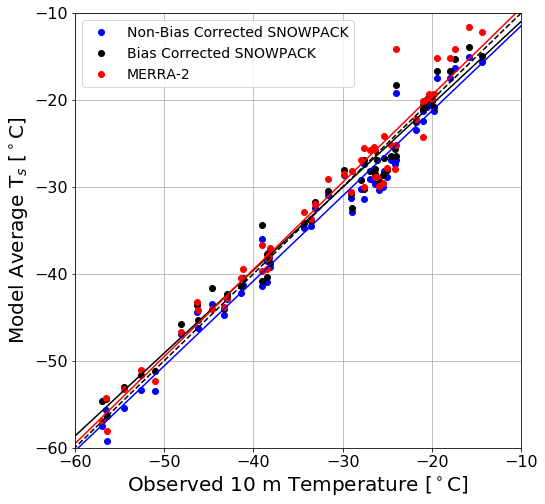

In [9]:
domain = np.array([-100, 0])

# Print bias and RMSE
print("Not bias corrected bias = " + str(nbc_bias))
print("Bias corrected bias = " + str(bc_bias))
print("MERRA-2 bias = " + str(M2_bias))
print()
print("Not bias corrected RMSE = " + str(nbc_rmse))
print("Bias corrected RMSE = " + str(bc_rmse))
print("MERRA-2 RMSE = " + str(M2_rmse))
print()
print("Not bias corrected r-squared = " + str(nbc_r_value**2))
print("Bias corrected r-squared = " + str(bc_r_value**2))
print("MERRA-2 r-squared = " + str(M2_r_value**2))
print()
print("Not bias corrected slope = " + str(nbc_slope))
print("Bias corrected slope = " + str(bc_slope))
print("MERRA-2 slope = " + str(M2_slope))

# Plot the figure
fig = plt.figure(figsize=(8,8))
plt.plot(ic_temp, nbc_model_avg_ts, 'bo', label = "Non-Bias Corrected SNOWPACK")
plt.plot(ic_temp, bc_model_avg_ts, 'ko', label = "Bias Corrected SNOWPACK")
plt.plot(ic_temp, tsg_MERRA2, 'ro', label = "MERRA-2")
plt.plot(domain, nbc_intercept + nbc_slope*domain, 'b')
plt.plot(domain, bc_intercept + bc_slope*domain, 'k')
plt.plot(domain, M2_intercept + M2_slope*domain, 'r')
plt.grid()
plt.xlabel("Observed 10 m Temperature [$^\circ$C]", fontsize = 20)
plt.ylabel("Model Average T$_{s}$ [$^\circ$C]", fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([-60, -10])
plt.ylim([-60, -10])
plt.plot([-100, 100], [-100, 100], 'k--')
plt.legend(fontsize = 14)
plt.show()
file_name = "Figures/Ice_Core_Model_Surface_Temperature_Comparison"
fig.savefig(file_name + ".pdf", format = 'pdf')


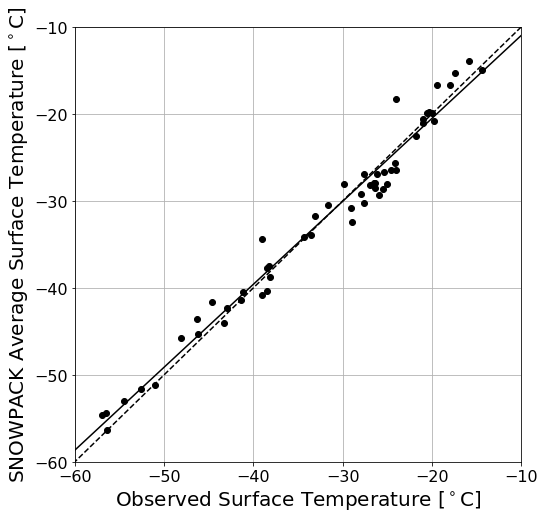

In [10]:
fig = plt.figure(figsize=(8,8))
plt.plot(ic_temp, bc_model_avg_ts, 'ko', label = "Bias Corrected SNOWPACK")
plt.plot(domain, bc_intercept + bc_slope*domain, 'k')
plt.grid()
plt.xlabel("Observed Surface Temperature [$^\circ$C]", fontsize = 20)
plt.ylabel("SNOWPACK Average Surface Temperature [$^\circ$C]", fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([-60, -10])
plt.ylim([-60, -10])
plt.plot([-100, 100], [-100, 100], 'k--')
plt.savefig('tmp.pdf', format='pdf', dpi=100)

In [11]:
ic_temp.max()

-14.4

In [12]:
ic_temp.min()

-57.0

In [13]:
df = gpd.read_file("/pl/active/nasa_smb/Data/ADD_Coastline_low_res_polygon.shp")
crs_epsg = ccrs.SouthPolarStereo()
df_epsg = df.to_crs(epsg='3031')

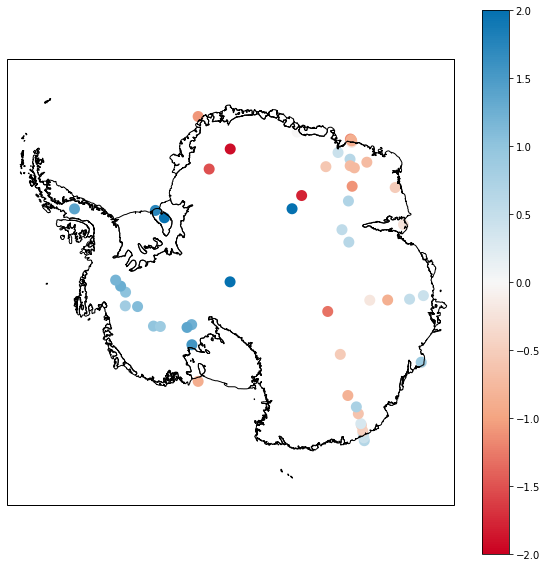

In [14]:
# Map
# Generate figure 
fig, axs = plt.subplots(1, 1, subplot_kw={'projection': crs_epsg},
                        figsize=(10, 10))

# Plot coastlines
axs.set_extent((-180, 180, -90, -65), ccrs.PlateCarree())
axs.add_geometries(df_epsg['geometry'], crs=crs_epsg,
                      facecolor='none', edgecolor='black')

# Bias after bc minus bias before bc
diff = np.abs(nbc_model_avg_ts - ic_temp) - np.abs(bc_model_avg_ts - ic_temp)

cbar = plt.scatter(ic_lon, ic_lat, c=diff, linewidth=5, \
    marker='o', transform=ccrs.Geodetic(), cmap = RdBu_5.mpl_colormap)
cbar = plt.colorbar()
plt.clim(-2, 2)

# Plot bias as a function of observed tempt

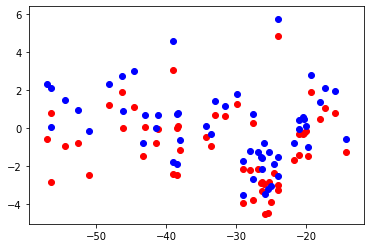

In [15]:
plt.scatter(ic_temp, nbc_model_avg_ts - ic_temp, c='r')
plt.scatter(ic_temp, bc_model_avg_ts - ic_temp, c='b')

In [16]:
bc_diff = bc_model_avg_ts - ic_temp
nbc_diff = nbc_model_avg_ts - ic_temp
M2_diff = tsg_MERRA2 - ic_temp


stats.ttest_ind(bc_diff, nbc_diff, equal_var=True)

Ttest_indResult(statistic=2.7996614109550735, pvalue=0.00606130234711769)

In [17]:
bc_diff.mean()

0.055804130200029306

In [18]:
M2_diff.mean()

0.5214096346768694